<a href="https://www.kaggle.com/code/nazarmohammed/data-science-project-internship?scriptVersionId=120195005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing the required libraries

In [2]:
# Importing basic libraries
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for model preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing library for model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [3]:
# Importing libraries for removing warnings
import warnings as warnings
warnings.filterwarnings("ignore")

In [4]:
# Importing the file
leads_df = pd.read_csv("/kaggle/input/dsicsv/Data_Science_Internship - Dump.csv",index_col=0)

In [5]:
leads_df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [6]:
# Now lets check the information

In [7]:
# Checking Shape
leads_df.shape

(46608, 15)

In [8]:
# Checking other values
leads_df.describe().T

,count,unique,top,freq
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186
status,46608,6,LOST,43244
lost_reason,43244,30,Low availability,8892
budget,42908,1857,£60 - £120 Per week,9862
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32970,477,10/09/22,2453
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


In [9]:
# Checking columns details
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


In [10]:
# Now lets start the data cleaning process

In [11]:
# Calculating the shape after removing duplicates
leads_modified_df = leads_df.drop_duplicates(keep = 'first')
leads_modified_df.shape

(46598, 15)

In [12]:
leads_modified_df = leads_modified_df[(leads_modified_df['status'] == 'WON') | (leads_modified_df['status'] == 'LOST')]
leads_modified_df['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

In [13]:
# Change the mapping of a column
leads_modified_df['status'] = leads_modified_df['status'].map({'WON':1, 'LOST':0})
leads_modified_df['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

In [14]:
# Replacing the '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with NaN
leads_modified_df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
leads_modified_df.head(3)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [15]:
# Function to remove the columns having more than 40% missing values
def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col

# Removing columns having 40% missing values
col = rmissingvaluecol(leads_modified_df, 40)
leads_modified_df = leads_modified_df[col]
leads_modified_df.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [16]:
# Deleting rows containing either 70% or more than 70% NaN Values
perc = 70.0 
min_count =  int(((100-perc)/100)*leads_modified_df.shape[1] + 1)
leads_modified_df = leads_modified_df.dropna(axis=0, thresh=min_count)
leads_modified_df.shape

(46307, 14)

In [17]:
# Checking the unique categories
column_names = leads_modified_df.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

In [18]:
# Removing columns with highly skewed data
skewed_columns_to_be_dropped = ['des_country','lead_id']

leads_modified_df.drop(skewed_columns_to_be_dropped, axis=1, inplace=True)
leads_modified_df.shape

(46307, 12)

In [19]:
round(leads_modified_df.isnull().sum() * 100 / len(leads_modified_df), 2)

Agent_id           0.00
status             0.00
lost_reason        6.63
budget             7.96
lease              5.04
movein            29.38
source            12.84
source_city       19.05
source_country    18.60
utm_source         0.13
utm_medium         6.87
des_city           5.46
dtype: float64

In [20]:
leads_modified_df.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

In [21]:
# Listing down categorical columns with missing values
categorical_column_names = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']
for column_name in categorical_column_names:
    print("Column Name        :", column_name)
    print("------------------------------")
    #print("Unique Values      : ", leads_modified_df[column_name].unique())
    
    values_to_be_imputed = leads_modified_df[column_name].isnull().sum()
    print("Any Null (Before)  :", values_to_be_imputed)
    
    leads_modified_df[column_name].fillna(leads_modified_df[column_name].mode()[0], inplace=True)
    print(values_to_be_imputed, " values imputed with mode values of the column.")
    
    print("Null Values (After):", leads_modified_df[column_name].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3072
3072  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3687
3687  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 2334
2334  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13605
13605  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5946
5946  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8821
8821  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [22]:
# Checking the unique categories
column_names = leads_modified_df.columns

for column_name in column_names:
    print("Column Name        :", column_name)
    print("-----------------------------------------------------")
    print(leads_modified_df[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
-----------------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


Column Name 

In [23]:
# Changing categories with lesser percentage to 'others'

def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = leads_modified_df.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    leads_modified_df[column_name] = leads_modified_df[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = leads_modified_df[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.658237
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.131276
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.762001
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.386248
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.308506
                                                                      ...    
e16d12cd21f38bc8253f65cc5c0bf4932cf1397ba1c60682b2a99049e0e7ceed     0.002160
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002160
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002160
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002160
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002160
Name: Agent_id, Length: 120, dtype: float64


After :
others       

In [24]:
leads_modified_df = leads_modified_df.dropna()

In [25]:
# Verifying various parameters after cleaning
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", leads_df.shape)
print("Missing:")
print("-----------------------")
print(round(leads_df.isnull().sum()*100/len(leads_df), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", leads_modified_df.shape)
print("Missing:")
print("-----------------------")
print(round(leads_modified_df.isnull().sum()*100/len(leads_modified_df), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.00
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (46307, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


In [26]:
column_names = ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

for column_name in column_names:
    dummies = pd.get_dummies(leads_modified_df[column_name])
    dummies.drop('others', axis=1, inplace=True)
    leads_modified_df = pd.concat([leads_modified_df, dummies], axis=1)
    leads_modified_df.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

leads_modified_df.head()

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,...,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


In [27]:
# Putting feature variable to X
X = leads_modified_df.drop('status', axis=1)

X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,10/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [28]:
# Putting response variable to y
y = leads_modified_df.status
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [29]:
# Splitting the data into train and test on a ratio of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

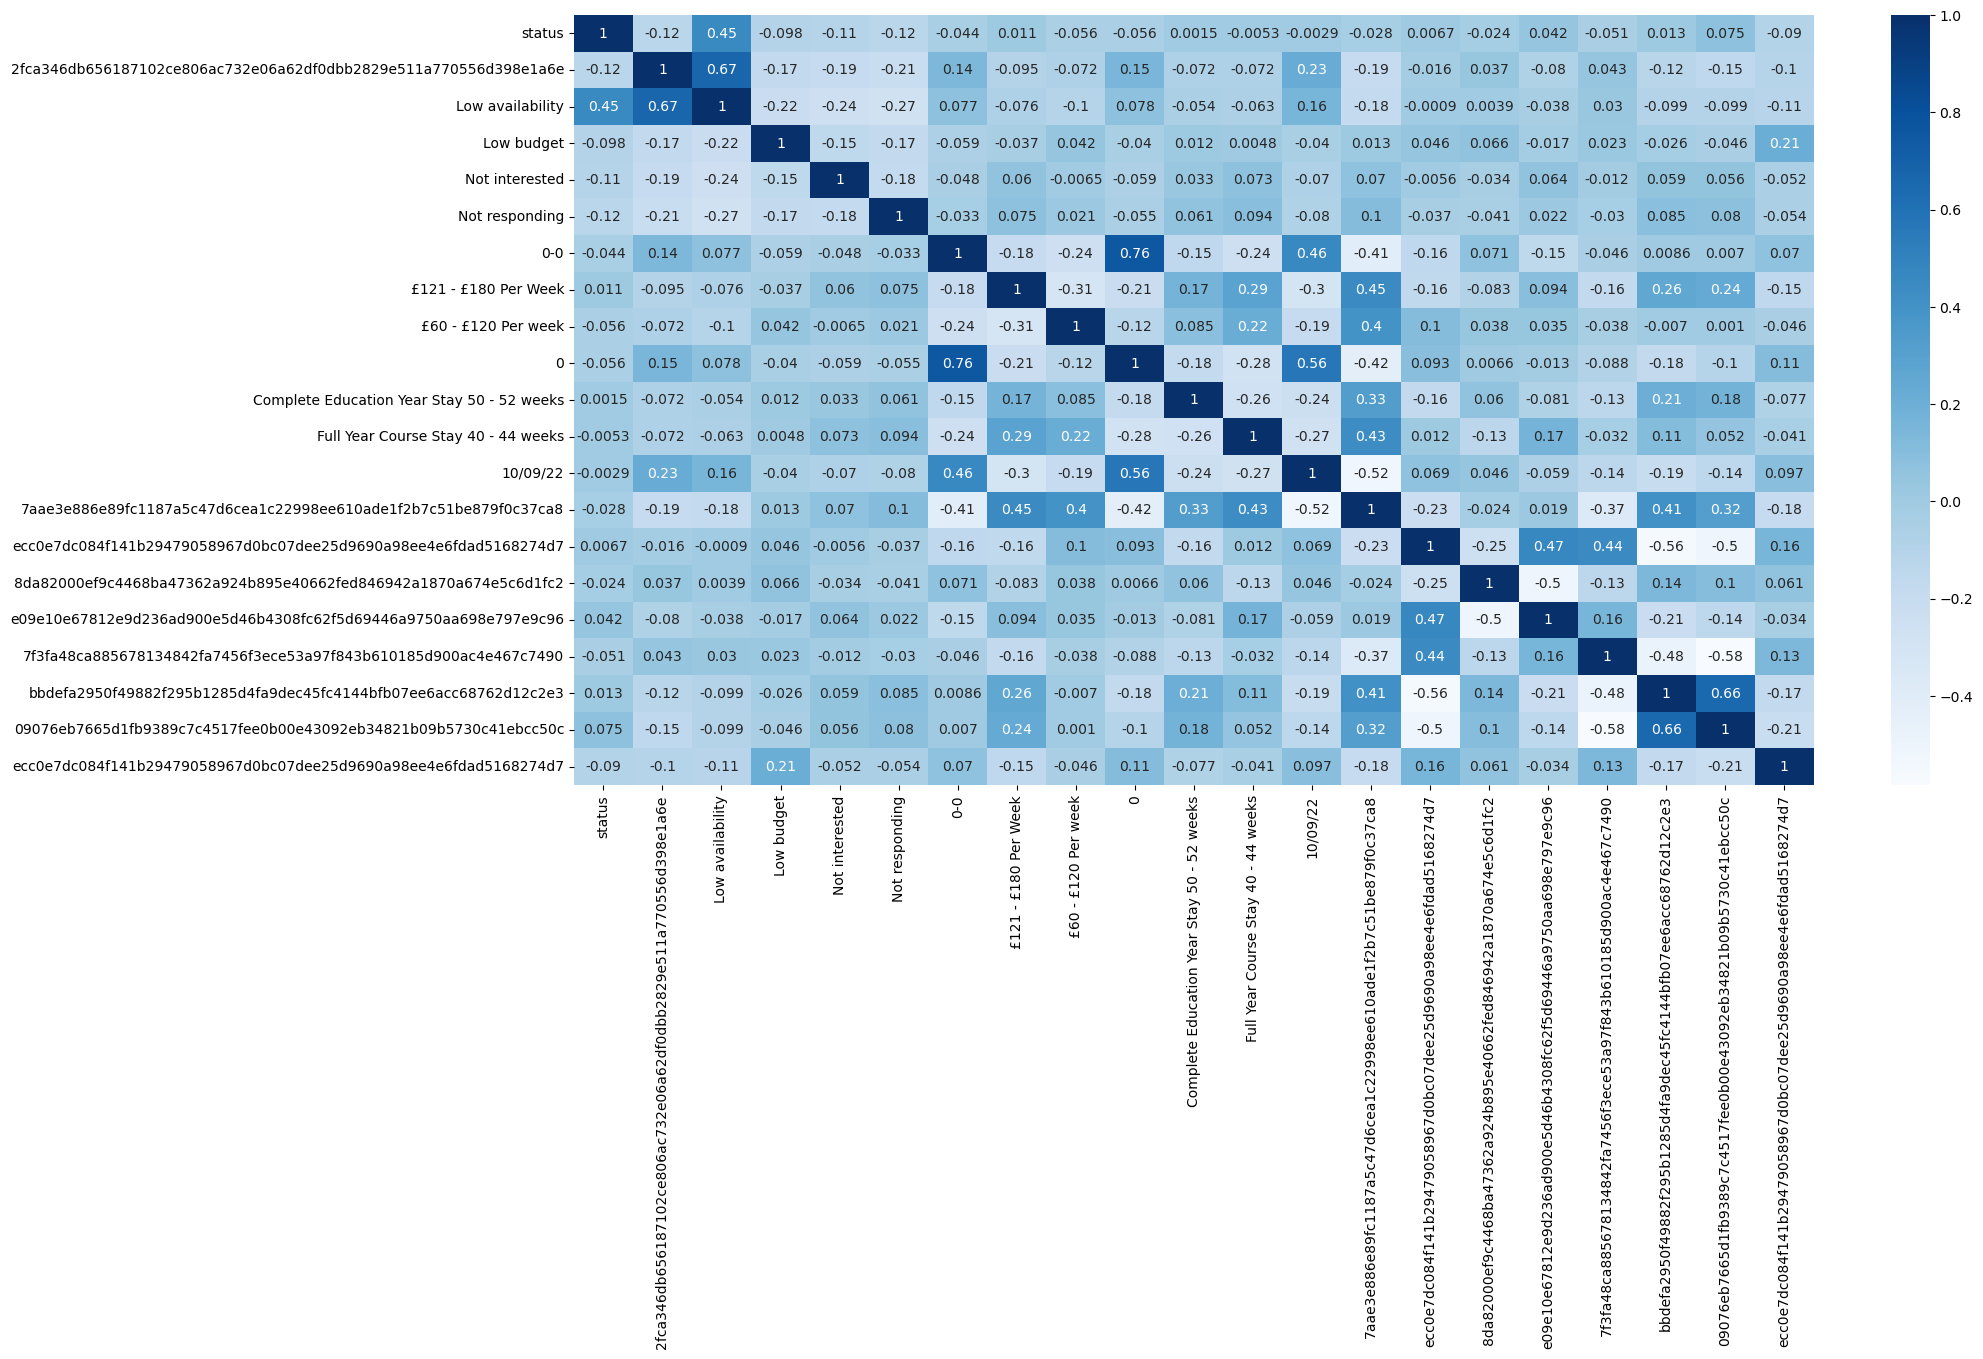

In [30]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_modified_df.corr(), annot = True, cmap="Blues")
plt.show()

In [31]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32393
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1461.3
Date:                Fri, 24 Feb 2023   Deviance:                       2922.6
Time:                        15:10:07   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3290
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.8819   2.37e+04     -0.001      0.999   -4.64e+04    4.64e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6546   3.08e+04     -0.001      0.999   -6.04e+04    6.04e+04
Low availability                                                    31.6255   2.37e+04      0.001      0.999   -4.64e+04    4.64e+04
Low budget                                                           0.2735    4.5e+04   6.08e-06      1.000   -8.82e+04    8.82e+04
Not interested                                                      -0.3886   4.44e+04  -8.76e-06      1.000   -8.69e+04    8.69e+04
Not responding                                                      -0.3236   4.13e+04  -7.84e-06      1.000   -8.09e+04    8.09e+04
0-0                                                                 -0.6577      0.256     -2.569      0.010      -1.160      -0.156
£121 - £180 Per Week                                                 0.2762      0.173      1.595      0.111      -0.063       0.616
£60 - £120 Per week                                                 -0.1498      0.148     -1.009      0.313      -0.441       0.141
0                                                                   -0.8364      0.243     -3.448      0.001      -1.312      -0.361
Complete Education Year Stay 50 - 52 weeks                           0.0578      0.170      0.340      0.734      -0.275       0.390
Full Year Course Stay 40 - 44 weeks                                  0.1089      0.147      0.740      0.459      -0.179       0.397
10/09/22                                                             0.2202      0.135      1.634      0.102      -0.044       0.484
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.7282      0.177     -4.123      0.000      -1.074      -0.382
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.1659      0.153      1.087      0.277      -0.133       0.465
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.0686      0.151     -0.454      0.650      -0.365       0.228
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.5860      0.124      4.722      0.000       0.343       0.829
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.5708      0.225     -2.538      0.011      -1.012      -0.130
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.1817      0.130      1.399      0.162      -0.073       0.436
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     0.8784      0.142      6.178      0.000       0.600       1.157
ecc0e7dc084f141b29479058

In [32]:
# Initializing LogisticRegression
logreg = LogisticRegression()

# Running RFE with 17 variables as output
rfe = RFE(logreg, step=17)             
rfe = rfe.fit(X_train, y_train)

# Listing the columns
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    print(i)

('2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e', True, 1)
('Low availability', True, 1)
('Low budget', True, 1)
('Not interested', True, 1)
('Not responding', True, 1)
('0-0', True, 1)
('£121 - £180 Per Week', False, 2)
('£60 - £120 Per week', False, 2)
('0', True, 1)
('Complete Education Year Stay 50 - 52 weeks', False, 2)
('Full Year Course Stay 40 - 44 weeks', False, 2)
('10/09/22', False, 2)
('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8', True, 1)
('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', False, 2)
('8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2', False, 2)
('e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96', False, 2)
('7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490', False, 2)
('bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3', False, 2)
('09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c', True, 1)
('ecc0e7dc084f141b29479058967d

In [33]:
# Listing down the columns important for building a model
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
       'Low availability', 'Low budget', 'Not interested', 'Not responding',
       '0-0', '0',
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [34]:
# Listing down the columns not important
z = X_train.columns[~rfe.support_]
z

Index(['£121 - £180 Per Week', '£60 - £120 Per week',
       'Complete Education Year Stay 50 - 52 weeks',
       'Full Year Course Stay 40 - 44 weeks', '10/09/22',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3'],
      dtype='object')

In [35]:
# Building our second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32414
Model:                            GLM   Df Residuals:                    32402
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1490.7
Date:                Fri, 24 Feb 2023   Deviance:                       2981.5
Time:                        15:10:08   Pearson chi2:                 3.34e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.3278
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -30.6560   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -31.6081    3.1e+04     -0.001      0.999   -6.09e+04    6.08e+04
Low availability                                                    31.6020   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Low budget                                                           0.2457   4.52e+04   5.43e-06      1.000   -8.86e+04    8.87e+04
Not interested                                                      -0.2972   4.47e+04  -6.65e-06      1.000   -8.75e+04    8.75e+04
Not responding                                                      -0.2606   4.16e+04  -6.27e-06      1.000   -8.15e+04    8.15e+04
0-0                                                                 -0.8000      0.245     -3.268      0.001      -1.280      -0.320
0                                                                   -0.5625      0.215     -2.614      0.009      -0.984      -0.141
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.5955      0.113     -5.288      0.000      -0.816      -0.375
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.1503      0.123      9.359      0.000       0.909       1.391
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.3180      0.124      2.572      0.010       0.076       0.560
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -2.8585      0.110    -25.992      0.000      -3.074      -2.643
====================================================================================================================================
"""

In [36]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.76704303e-14, 1.16240419e-13, 2.06901847e-15, 6.20165470e-15,
       8.95746710e-14, 8.40593239e-14, 1.48612463e-13, 8.45749681e-14,
       6.51733280e-14, 1.08128433e-13])

In [37]:
# Forming prediction table 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,2.767043e-14,38889
1,0,1.162404e-13,37925
2,0,2.069018e-15,11421
3,0,6.201655e-15,30608
4,0,8.957467e-14,31394


In [38]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,2.767043e-14,38889,0
1,0,1.162404e-13,37925,0
2,0,2.069018e-15,11421,0
3,0,6.201655e-15,30608,0
4,0,8.957467e-14,31394,0


In [39]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,2.767043e-14,38889,0,0
1,0,1.162404e-13,37925,0,0
2,0,2.069018e-15,11421,0,0
3,0,6.201655e-15,30608,0,0
4,0,8.957467e-14,31394,0,0


In [40]:
y_train_pred_final['Lead_Score'].value_counts()

0     29135
82     1038
89      469
92      262
20      183
17      172
86      159
68      156
78      124
32      109
72       77
13       76
10       64
11       57
39       41
4        40
40       35
59       31
66       31
67       30
27       30
26       17
8        15
54       12
74       11
79       11
14       10
6         9
5         4
53        4
61        1
21        1
Name: Lead_Score, dtype: int64

In [41]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [42]:
# Let's check the overall report.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414



In [43]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,0-0,0.13
6,0,0.10
1,Low availability,0.06
0,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.05
3,Not interested,0.04
4,Not responding,0.04
2,Low budget,0.02
7,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0.02
9,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.02
8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,0.00


In [44]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [45]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

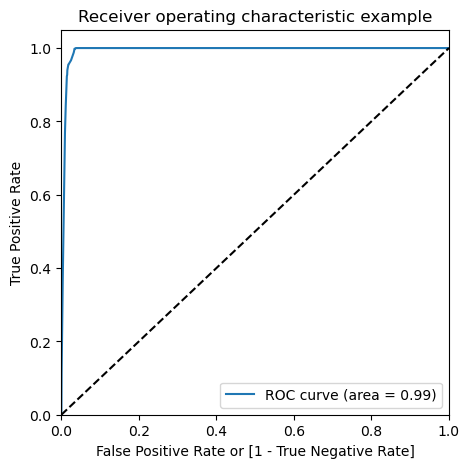

In [46]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [47]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.767043e-14,38889,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.162404e-13,37925,0,0,1,0,0,0,0,0,0,0,0,0
2,0,2.069018e-15,11421,0,0,1,0,0,0,0,0,0,0,0,0
3,0,6.201655e-15,30608,0,0,1,0,0,0,0,0,0,0,0,0
4,0,8.957467e-14,31394,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.066545  1.000000  0.000000
0.1   0.1  0.967236  0.998146  0.965033
0.2   0.2  0.974733  0.966620  0.975311
0.3   0.3  0.980317  0.955030  0.982120
0.4   0.4  0.981767  0.923041  0.985954
0.5   0.5  0.981767  0.923041  0.985954
0.6   0.6  0.981304  0.908669  0.986482
0.7   0.7  0.979021  0.840983  0.988862
0.8   0.8  0.976029  0.766806  0.990944
0.9   0.9  0.940489  0.113584  0.999438


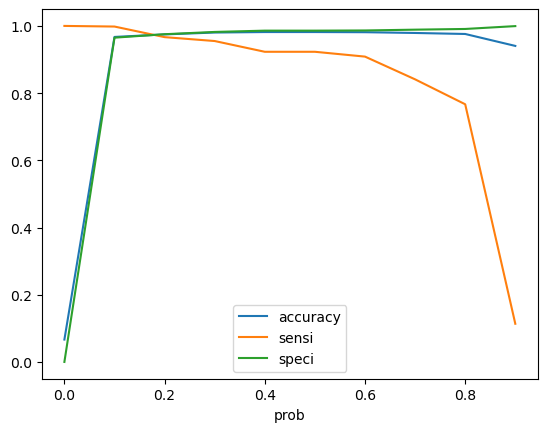

In [49]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [50]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,2.767043e-14,38889,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.162404e-13,37925,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,2.069018e-15,11421,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,6.201655e-15,30608,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,8.957467e-14,31394,0,0,1,0,0,0,0,0,0,0,0,0,0


In [51]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29832   425]
 [  166  1991]]


In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [53]:
# Accuracy - Measures of Accuracy
# Describes overall, how often the classifier correct.
(TP+TN)/(TP+TN+FP+FN)

0.9817671376565682

In [54]:
# Sensitivity/Recall - When it’s actually yes, how often does it predict yes?
TP/(TP+FN)

0.923041261010663

In [55]:
# Specificity - When it’s actually no, how often does it predict no?
TN/(TN+FP)

0.9859536636150312

In [56]:
# Precision - When it predicts yes, how often is it correct?
TP/(TP+FP)

0.8240894039735099

In [57]:
# Let's check the overall accuracy.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30257
           1       0.82      0.92      0.87      2157

    accuracy                           0.98     32414
   macro avg       0.91      0.95      0.93     32414
weighted avg       0.98      0.98      0.98     32414



In [58]:
metrics.recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.923041261010663

In [59]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

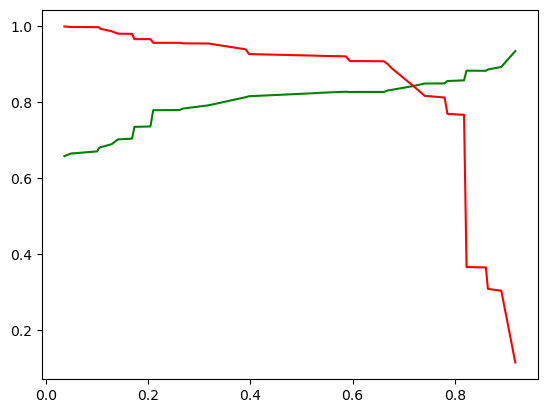

In [60]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [61]:
X_test = X_test[col]
X_test.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,0,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
42116,1,1,0,0,0,0,0,1,0,1,1
18517,0,0,0,0,1,1,1,0,1,0,0
17619,0,0,0,0,1,0,0,0,0,0,0
44334,0,0,1,0,0,0,1,1,0,1,0
16597,0,0,0,0,0,0,0,1,1,0,0


In [62]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

42116    2.097395e-15
18517    3.026964e-14
17619    3.742123e-14
44334    2.680356e-14
16597    8.457497e-14
3849     2.697952e-15
21111    6.282732e-14
30357    3.973887e-01
22706    1.626164e-15
6747     8.457497e-14
dtype: float64

In [63]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
42116,2.097395e-15
18517,3.026964e-14
17619,3.742123e-14
44334,2.680356e-14
16597,8.457497e-14


In [64]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,status,LeadId,0
0,0,42116,2.097395e-15
1,0,18517,3.026964e-14
2,0,17619,3.742123e-14
3,0,44334,2.680356e-14
4,0,16597,8.457497e-14


In [65]:
y_pred_final['status'].value_counts()

0    12978
1      915
Name: status, dtype: int64

In [66]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadId','status','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,LeadId,status,Converted_Prob
0,42116,0,2.097395e-15
1,18517,0,3.026964e-14
2,17619,0,3.742123e-14
3,44334,0,2.680356e-14
4,16597,0,8.457497e-14


In [67]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,LeadId,status,Converted_Prob,final_predicted,Lead_Score
0,42116,0,2.097395e-15,0,0
1,18517,0,3.026964e-14,0,0
2,17619,0,3.742123e-14,0,0
3,44334,0,2.680356e-14,0,0
4,16597,0,8.457497e-14,0,0


In [68]:
metrics.confusion_matrix(y_pred_final.status, y_pred_final.final_predicted)

array([[12750,   228],
       [   41,   874]])

In [69]:
# Let's check the overall report.
print(metrics.classification_report(y_pred_final.status, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12978
           1       0.79      0.96      0.87       915

    accuracy                           0.98     13893
   macro avg       0.89      0.97      0.93     13893
weighted avg       0.98      0.98      0.98     13893



Final Result
Let us have a look at the various metrics obtained for the dataset:

Conclusion :
Accuracy : 98.28%
Sensitivity : 92.40%
Specificity : 98.66%
Precision : 81.94%